In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [8]:
# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터셋 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# 랜덤 포레스트 분류기
rf = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [10, 50, 100, 200],      # 트리의 개수
    'max_depth': [None, 10, 20, 30],         # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],         # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],           # 리프 노드의 최소 샘플 수
}


In [10]:
# Grid SearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# 훈련 데이터에 대해 Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


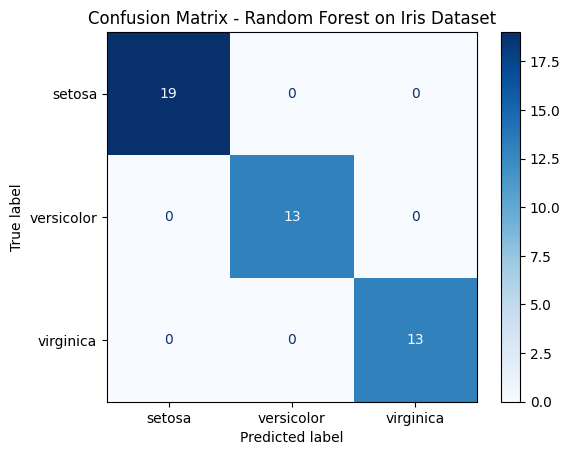

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 최적화된 모델 가져오기
best_rf = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_rf.predict(X_test)

# 5. 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 6. 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')  # 'Blues' 색상 맵 사용
plt.title('Confusion Matrix - Random Forest on Iris Dataset')
plt.show()

### 실습문제

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [15]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695